In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

# Parameters
t0, t, V=0, 1, 3
Nk = 201

kzs = np.linspace(-np.pi,np.pi, Nk)
kx = 0 # Fixed kx for visualization of energy vs kz

L = 30 # OBC in y-direction

B= 2*np.pi/L # Magnetic field

# P - qA
# A = (-By, 0, 0 ), A (0, Bx, 0) along +z-direction
# q is assumed to be 1 and ignored

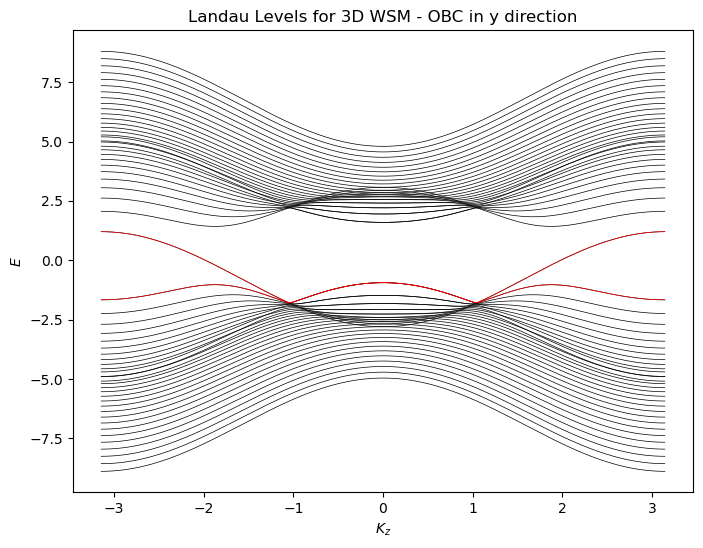

In [3]:
# Hamiltonian and diagonalization
eigvals_oc_vs_kz = []
for kz in kzs:
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H0 = (-2*t0*np.sin(kx+B*i))*I2 +(2*t*np.sin(kx+B*i))* sigma_x + (2*t*np.cos(kz)+2*t*(np.cos(kx+B*i))-V)* sigma_z
        V0 = -1j*t * sigma_y -t*sigma_z
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L-1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
        else:
            H_open[2*i:2*i+2, 0:2] = V0
            H_open[0:2, 2*i:2*i+2] = V0.conj().T

    
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kz.append(eigenvals_oc)

eigvals_oc_vs_kz = np.array(eigvals_oc_vs_kz).T

# Plot
fig, ax = plt.subplots(figsize=(8,6))
for band in eigvals_oc_vs_kz:
    ax.plot (kzs, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 3D WSM - OBC in y direction')

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, eigvals_oc_vs_kz[b], color='red', linewidth =0.5)


plt.show()
